In [1]:
import pandas as pd

In [27]:
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/Credit Card Fraud.csv",sep=";")
df

,merchan_id,avg_amount_days,transaction_amount,is_declined,number_declines_days,foreign_transaction,high_risk_countries,daily_chbk_avg_amt,6m_avg_chbk_amt,6m_chbk_freq,is_fradulent
0,3160040998,100.0,3000.0,no,5,yes,yes,0,0.0,0,fraudulent
1,3160040998,100.0,4300.0,no,5,yes,yes,0,0.0,0,fraudulent
2,3160041896,185.5,4823.0,yes,5,no,no,0,0.0,0,fraudulent
3,3160141996,185.5,5008.5,yes,8,no,no,0,0.0,0,fraudulent
4,3160241992,500.0,26000.0,no,0,yes,yes,800,677.2,6,fraudulent
...,...,...,...,...,...,...,...,...,...,...,...
3070,6661273532,500.0,11000.0,yes,0,no,no,754,585.0,7,non-fraudulent
3071,6661273532,800.0,0.0,yes,0,no,no,754,585.0,7,non-fraudulent
3072,6661273533,800.0,20800.0,yes,0,no,no,754,585.0,7,non-fraudulent
3073,6661273532,1500.0,12000.0,yes,0,yes,yes,754,585.0,7,non-fraudulent


In [3]:
df.head()

,merchan_id,avg_amount_days,transaction_amount,is_declined,number_declines_days,foreign_transaction,high_risk_countries,daily_chbk_avg_amt,6m_avg_chbk_amt,6m_chbk_freq,is_fradulent
0,3160040998,100.0,3000.0,no,5,yes,yes,0,0.0,0,fraudulent
1,3160040998,100.0,4300.0,no,5,yes,yes,0,0.0,0,fraudulent
2,3160041896,185.5,4823.0,yes,5,no,no,0,0.0,0,fraudulent
3,3160141996,185.5,5008.5,yes,8,no,no,0,0.0,0,fraudulent
4,3160241992,500.0,26000.0,no,0,yes,yes,800,677.2,6,fraudulent


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   merchan_id            3075 non-null   int64  
 1   avg_amount_days       3075 non-null   float64
 2   transaction_amount    3075 non-null   float64
 3   is_declined           3075 non-null   object 
 4   number_declines_days  3075 non-null   int64  
 5   foreign_transaction   3075 non-null   object 
 6   high_risk_countries   3075 non-null   object 
 7   daily_chbk_avg_amt    3075 non-null   int64  
 8   6m_avg_chbk_amt       3075 non-null   float64
 9   6m_chbk_freq          3075 non-null   int64  
 10  is_fradulent          3075 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 264.4+ KB


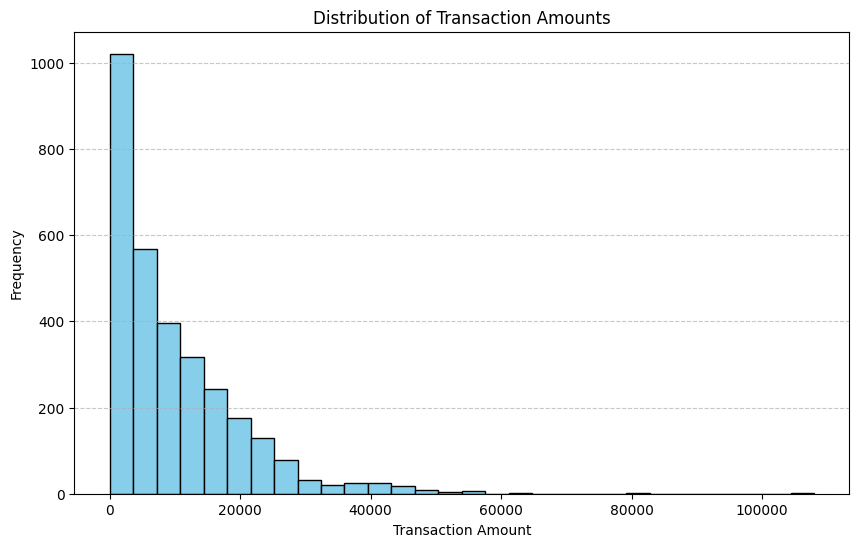

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(df['transaction_amount'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

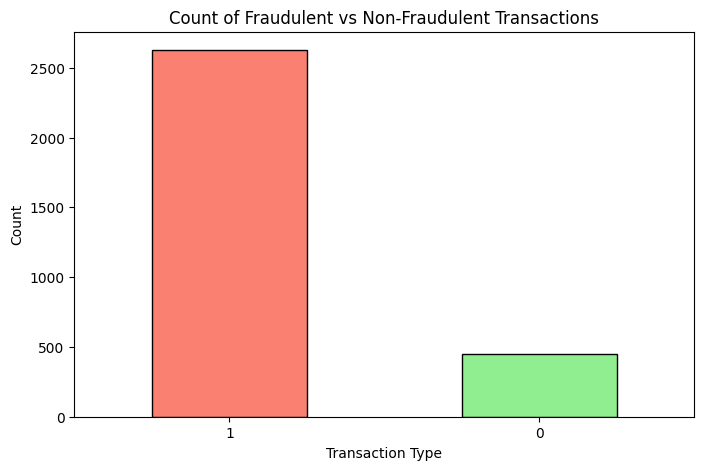

In [29]:
plt.figure(figsize=(8, 5))
df['is_fradulent'].value_counts().plot(kind='bar', color=['salmon', 'lightgreen'], edgecolor='black')
plt.title('Count of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

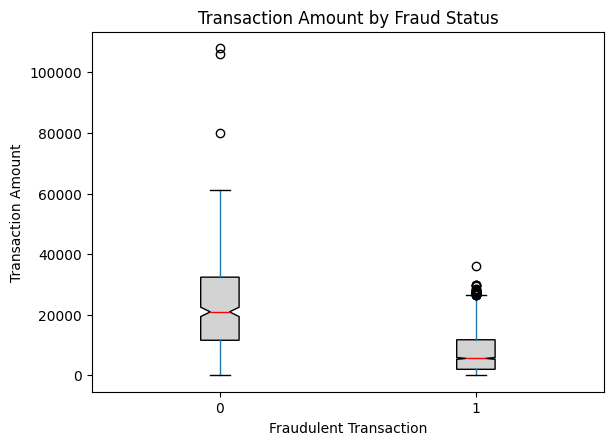

In [30]:
plt.figure(figsize=(10, 6))
df.boxplot(column='transaction_amount', by='is_fradulent', grid=False, notch=True, patch_artist=True,
           boxprops=dict(facecolor='lightgrey', color='black'),
           medianprops=dict(color='red'))
plt.title('Transaction Amount by Fraud Status')
plt.suptitle('')
plt.xlabel('Fraudulent Transaction')
plt.ylabel('Transaction Amount')
plt.show()

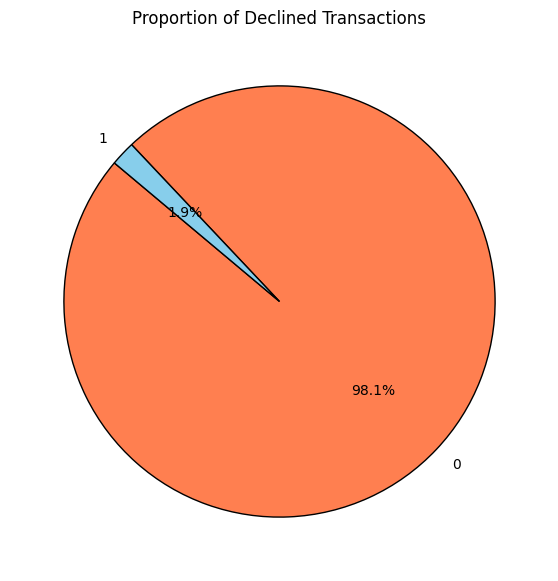

In [31]:
plt.figure(figsize=(7, 7))
df['is_declined'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['coral', 'skyblue'], startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Proportion of Declined Transactions')
plt.ylabel('')
plt.show()

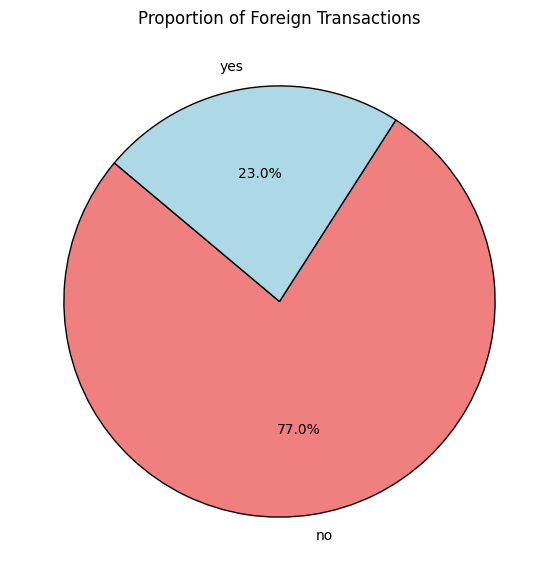

In [32]:
plt.figure(figsize=(7, 7))
df['foreign_transaction'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Proportion of Foreign Transactions')
plt.ylabel('')
plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
df["is_fradulent"]=encode.fit_transform(df["is_fradulent"])

In [6]:
df["is_declined"]=encode.fit_transform(df["is_declined"])

In [7]:
df["high_risk_countries"]=encode.fit_transform(df["high_risk_countries"])

In [8]:
df

,merchan_id,avg_amount_days,transaction_amount,is_declined,number_declines_days,foreign_transaction,high_risk_countries,daily_chbk_avg_amt,6m_avg_chbk_amt,6m_chbk_freq,is_fradulent
0,3160040998,100.0,3000.0,0,5,yes,1,0,0.0,0,0
1,3160040998,100.0,4300.0,0,5,yes,1,0,0.0,0,0
2,3160041896,185.5,4823.0,1,5,no,0,0,0.0,0,0
3,3160141996,185.5,5008.5,1,8,no,0,0,0.0,0,0
4,3160241992,500.0,26000.0,0,0,yes,1,800,677.2,6,0
...,...,...,...,...,...,...,...,...,...,...,...
3070,6661273532,500.0,11000.0,1,0,no,0,754,585.0,7,1
3071,6661273532,800.0,0.0,1,0,no,0,754,585.0,7,1
3072,6661273533,800.0,20800.0,1,0,no,0,754,585.0,7,1
3073,6661273532,1500.0,12000.0,1,0,yes,1,754,585.0,7,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   merchan_id            3075 non-null   int64  
 1   avg_amount_days       3075 non-null   float64
 2   transaction_amount    3075 non-null   float64
 3   is_declined           3075 non-null   int64  
 4   number_declines_days  3075 non-null   int64  
 5   foreign_transaction   3075 non-null   object 
 6   high_risk_countries   3075 non-null   int64  
 7   daily_chbk_avg_amt    3075 non-null   int64  
 8   6m_avg_chbk_amt       3075 non-null   float64
 9   6m_chbk_freq          3075 non-null   int64  
 10  is_fradulent          3075 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 264.4+ KB


In [10]:
df.isnull().sum()

,0
merchan_id,0
avg_amount_days,0
transaction_amount,0
is_declined,0
number_declines_days,0
foreign_transaction,0
high_risk_countries,0
daily_chbk_avg_amt,0
6m_avg_chbk_amt,0
6m_chbk_freq,0


In [11]:
df2=df.select_dtypes(include=['int','float64'])
df2

,merchan_id,avg_amount_days,transaction_amount,is_declined,number_declines_days,high_risk_countries,daily_chbk_avg_amt,6m_avg_chbk_amt,6m_chbk_freq,is_fradulent
0,3160040998,100.0,3000.0,0,5,1,0,0.0,0,0
1,3160040998,100.0,4300.0,0,5,1,0,0.0,0,0
2,3160041896,185.5,4823.0,1,5,0,0,0.0,0,0
3,3160141996,185.5,5008.5,1,8,0,0,0.0,0,0
4,3160241992,500.0,26000.0,0,0,1,800,677.2,6,0
...,...,...,...,...,...,...,...,...,...,...
3070,6661273532,500.0,11000.0,1,0,0,754,585.0,7,1
3071,6661273532,800.0,0.0,1,0,0,754,585.0,7,1
3072,6661273533,800.0,20800.0,1,0,0,754,585.0,7,1
3073,6661273532,1500.0,12000.0,1,0,1,754,585.0,7,1


In [12]:
column=["avg_amount_days","transaction_amount","is_declined","high_risk_countries","6m_avg_chbk_amt","is_fradulent"]
df2=df2[column]
df2

,avg_amount_days,transaction_amount,is_declined,high_risk_countries,6m_avg_chbk_amt,is_fradulent
0,100.0,3000.0,0,1,0.0,0
1,100.0,4300.0,0,1,0.0,0
2,185.5,4823.0,1,0,0.0,0
3,185.5,5008.5,1,0,0.0,0
4,500.0,26000.0,0,1,677.2,0
...,...,...,...,...,...,...
3070,500.0,11000.0,1,0,585.0,1
3071,800.0,0.0,1,0,585.0,1
3072,800.0,20800.0,1,0,585.0,1
3073,1500.0,12000.0,1,1,585.0,1


In [13]:
x=df2.drop("is_fradulent",axis=1)

In [14]:
x

,avg_amount_days,transaction_amount,is_declined,high_risk_countries,6m_avg_chbk_amt
0,100.0,3000.0,0,1,0.0
1,100.0,4300.0,0,1,0.0
2,185.5,4823.0,1,0,0.0
3,185.5,5008.5,1,0,0.0
4,500.0,26000.0,0,1,677.2
...,...,...,...,...,...
3070,500.0,11000.0,1,0,585.0
3071,800.0,0.0,1,0,585.0
3072,800.0,20800.0,1,0,585.0
3073,1500.0,12000.0,1,1,585.0


In [15]:
y=df2["is_fradulent"]

In [16]:
y

,is_fradulent
0,0
1,0
2,0
3,0
4,0
...,...
3070,1
3071,1
3072,1
3073,1


In [17]:
#training and testing data bifurcation
from sklearn.model_selection import train_test_split
#split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.30, random_state =0)

In [18]:
# pip install keras
# pip install tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [19]:
classifier=Sequential()

In [20]:
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=5))
classifier.add(Dropout(rate=0.1))

classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate=0.1))

classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
classifier.compile(optimizer="Adam" ,loss="binary_crossentropy", metrics=['accuracy'])

In [37]:
history = classifier.fit(xTrain, yTrain, batch_size=100, epochs=100, validation_split=0.2)  # Use 20% of data for validation

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9513 - loss: 0.1479 - val_accuracy: 0.9606 - val_loss: 0.0956
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9607 - loss: 0.1276 - val_accuracy: 0.9513 - val_loss: 0.1324
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9574 - loss: 0.1216 - val_accuracy: 0.9791 - val_loss: 0.0702
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9672 - loss: 0.0851 - val_accuracy: 0.9768 - val_loss: 0.0811
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9745 - loss: 0.0903 - val_accuracy: 0.9745 - val_loss: 0.0892
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9700 - loss: 0.1043 - val_accuracy: 0.9768 - val_loss: 0.0734
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9711 - loss: 0.0994 - val_accuracy: 0.9768 - val_loss: 0.1145
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9702 - loss: 0.1149 - val_accuracy: 0.9768 - 

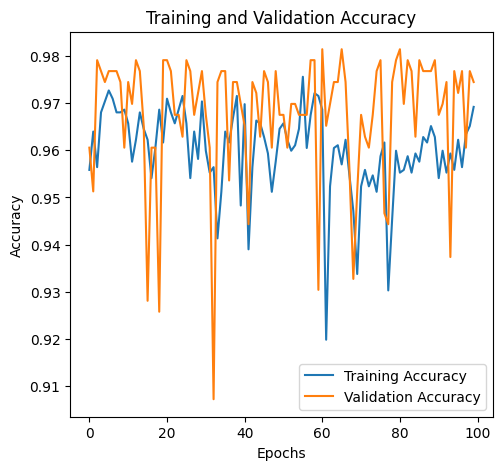

In [39]:
plt.figure(figsize=(12, 5))
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

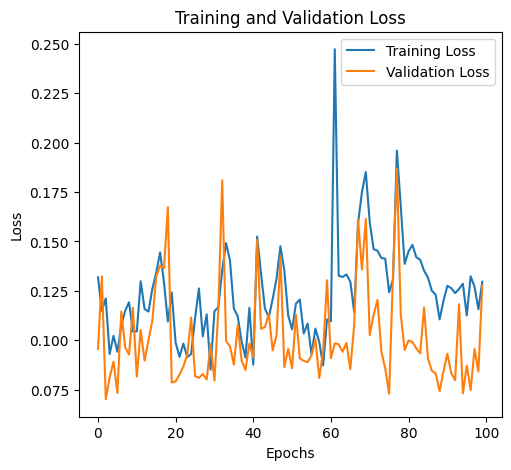

In [41]:
# Loss plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
Ann_pred=classifier.predict(xTest)
Ann_pred

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[8.92339766e-01],
       [8.92339766e-01],
       [9.99999881e-01],
       [8.92339766e-01],
       [8.92339766e-01],
       [8.92339766e-01],
       [8.92339766e-01],
       [8.92339766e-01],
       [1.00000000e+00],
       [4.56721395e-01],
       [8.92339766e-01],
       [8.92339766e-01],
       [8.92339766e-01],
       [8.92339766e-01],
       [8.92339766e-01],
       [8.92339766e-01],
       [1.00000000e+00],
       [4.33597565e-01],
       [1.00000000e+00],
       [8.92339766e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [8.92339766e-01],
       [8.92339766e-01],
       [2.79239387e-08],
       [8.92339766e-01],
       [4.88629133e-01],
       [4.35301466e-08],
       [8.92339766e-01],
       [1.00000000e+00],
       [8.92339766e-01],
       [8.92339766e-01],
       [8.92339766e-01],
       [1.39857832e-07],
       [8.92339766e-01],
       [8.92339766e-01],
       [8.92339766e-01],
       [8.92339766e-01],
       [8.92339766e-01],
       [8.92339766e-01],


In [43]:
Ann_pred=(Ann_pred>0.5)
Ann_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

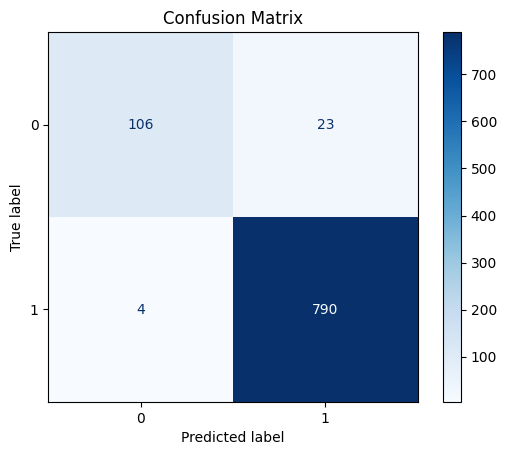

In [47]:
cm=confusion_matrix(yTest,Ann_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [48]:

acc = accuracy_score(yTest,Ann_pred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest,Ann_pred)
print("The precision is {}".format(prec))

f1 = f1_score(yTest,Ann_pred)
print("The F1-Score is {}".format(f1))

The accuracy is 0.9707475622968581
The precision is 0.971709717097171
The F1-Score is 0.9831985065339142
